# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [121]:
states_edu_df = pd.read_csv('../data/states_edu.csv')
states_edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [122]:
states_edu_df["AVG_READING_4_SCORE"].isna().sum()

np.int64(1065)

In [123]:
states_edu_df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [124]:
# @@@ 1
# Your Code
unique_years = states_edu_df["YEAR"].unique()
print(f"there are {len(unique_years)} unique years of data logged in the dataset")

there are 14 unique years of data logged in the dataset


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [125]:
# @@@ 2
g4_reading_mi = states_edu_df.loc[states_edu_df["STATE"]=="MICHIGAN", "AVG_READING_4_SCORE"].mean()
g4_reading_oh = states_edu_df.loc[states_edu_df["STATE"]=="OHIO", "AVG_READING_4_SCORE"].mean()
print(f"grade 4 reading exam \n Michigan : {g4_reading_mi} \n Ohio : {g4_reading_oh}")
print(f"comparing grade 4 reading exam average, Ohio has the higher average across all years")

grade 4 reading exam 
 Michigan : 217.83333333333334 
 Ohio : 223.1818181818182
comparing grade 4 reading exam average, Ohio has the higher average across all years


Find the average for your chosen test across all states in 2019

In [126]:
# @@@ 3
states_edu_df[states_edu_df["YEAR"]==2019].groupby("STATE")["AVG_READING_4_SCORE"].mean()

STATE
ALABAMA                 212.0
ALASKA                  204.0
ARIZONA                 216.0
ARKANSAS                215.0
CALIFORNIA              216.0
COLORADO                225.0
CONNECTICUT             224.0
DELAWARE                218.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 225.0
GEORGIA                 218.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                218.0
INDIANA                 222.0
IOWA                    221.0
KANSAS                  219.0
KENTUCKY                221.0
LOUISIANA               210.0
MAINE                   221.0
MARYLAND                220.0
MASSACHUSETTS           231.0
MICHIGAN                218.0
MINNESOTA               222.0
MISSISSIPPI             219.0
MISSOURI                218.0
MONTANA                 222.0
NATIONAL                220.0
NEBRASKA                222.0
NEVADA                  218.0
NEW_HAMPSHIRE           224.0
NEW_JERSEY              227.0
NEW_

For each state, find a maximum value for your chosen test score

In [127]:
# @@@ 4
states_edu_df.groupby("STATE")["AVG_READING_4_SCORE"].max()


STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [128]:
# @@@ 5
# TOTAL_REVENUE, TOTAL_EXPENDITURE, INSTRUCTION_EXPENDITURE, GRADES_ALL (estimate total students)
states_edu_df["instruction_expenditure_per_student"] = states_edu_df["INSTRUCTION_EXPENDITURE"] / states_edu_df["GRADES_ALL_G"]


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

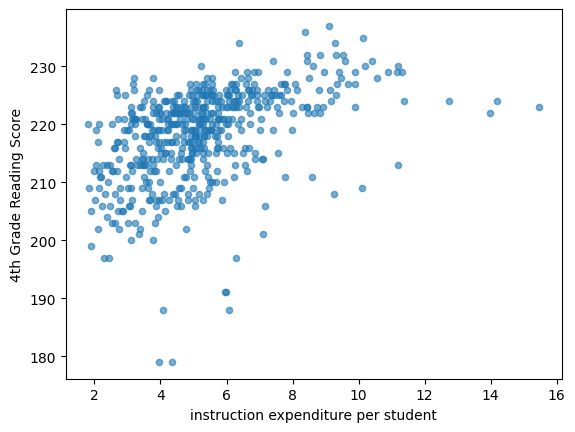

In [129]:
# @@@ 6
states_edu_df.plot.scatter(x='instruction_expenditure_per_student', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('instruction expenditure per student')
plt.ylabel('4th Grade Reading Score')

from the plot, I see a moderate linear positive relationship between 4th grade reading scores and instruction expenditure per student.

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

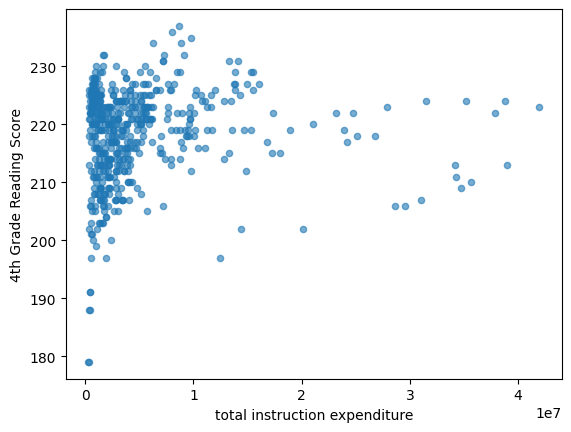

In [130]:
# @@@ 7
states_edu_df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('total instruction expenditure')
plt.ylabel('4th Grade Reading Score')

From the plot, there seems to be no obviouse relationship between 4th grade reading score and total instruction expenditure.

**<CAPTION FOR VIZ 2>**

Text(0, 0.5, '4th Grade Reading Score')

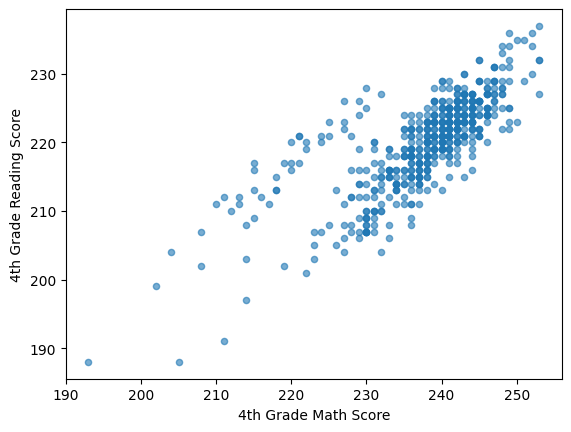

In [146]:
states_edu_df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('4th Grade Reading Score')

From the plot, there seems to have a strong positive lienar relationship between grade 4 average math score and grade 4 reading score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
# @@@ 8

X = states_edu_df[["instruction_expenditure_per_student", 'INSTRUCTION_EXPENDITURE', "AVG_MATH_4_SCORE"]].dropna()
y = states_edu_df.loc[X.index]['AVG_READING_4_SCORE']

X.shape

(399, 3)

In [134]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [135]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [136]:
# @@@ 11
# create your model here
model = LinearRegression()

In [137]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [138]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [140]:
# the intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)

84.13696427444029
[ 2.42977985e-01 -4.99836736e-08  5.67355176e-01]


In [141]:
model.score(X_test, y_test)

0.6234766086599067

In [ ]:
# @@@ 12
from sklearn.metrics import mean_absolute_error
# on average, how far the model’s predictions are from the actual values
mean_absolute_error(y_test, y_pred)

3.8661248892341122

In [150]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6234766086599067

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

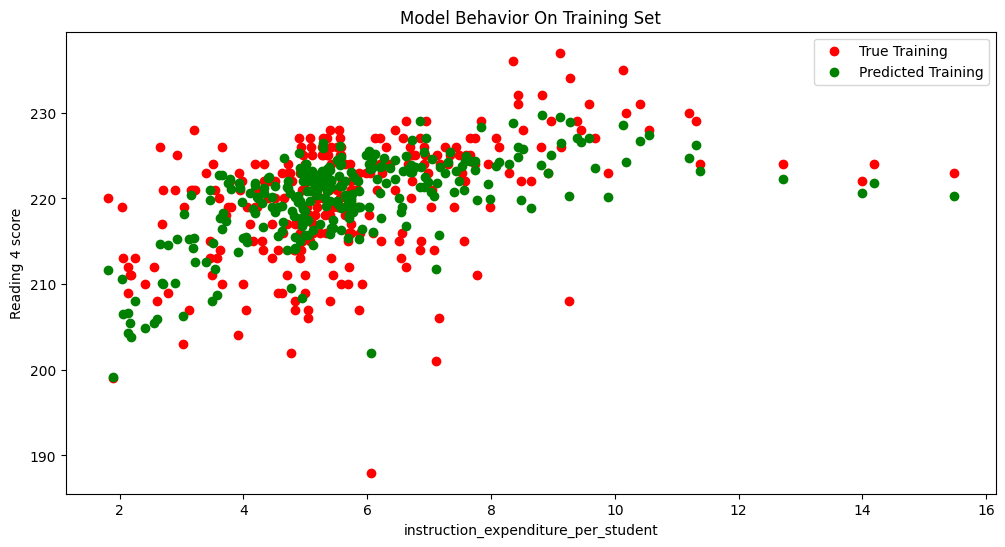

In [143]:
# @@@ 13

col_name = 'instruction_expenditure_per_student'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

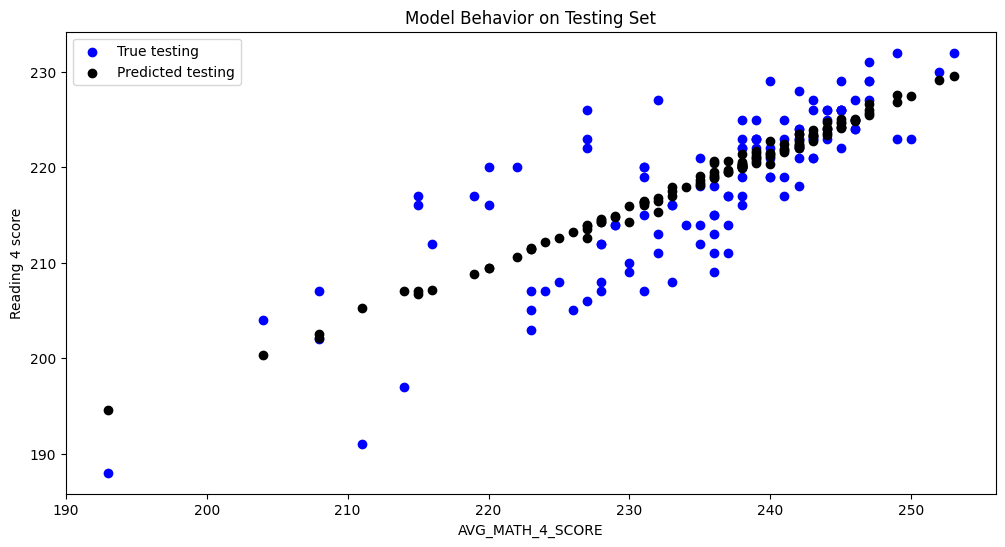

In [144]:
col_name = "AVG_MATH_4_SCORE"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

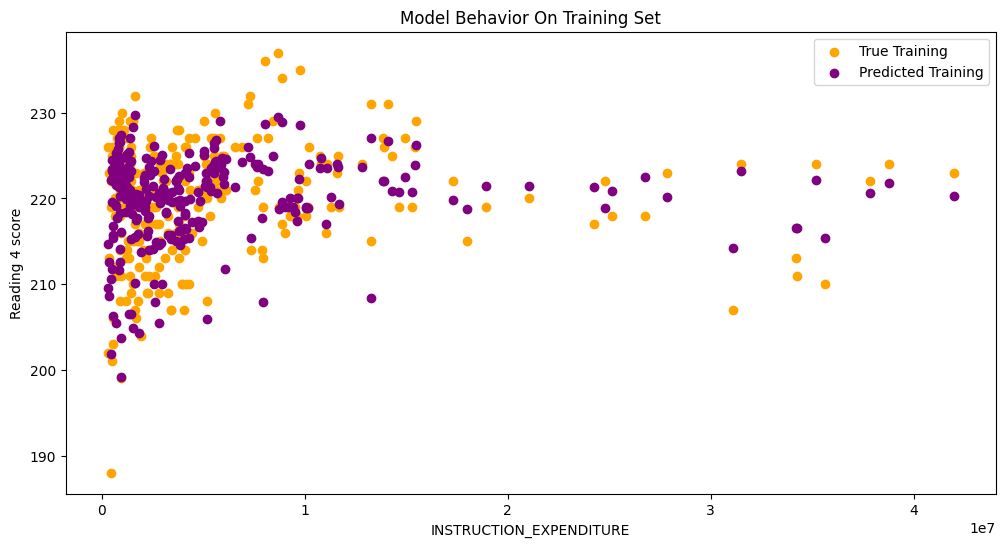

In [154]:
# @@@ 13

col_name = 'INSTRUCTION_EXPENDITURE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "orange")
plt.scatter(X_train[col_name], model.predict(X_train), color = "purple")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")